In [1]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

In [2]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[: , 1:].values, df_wine.iloc[: , 0].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify = y, random_state = 0)


In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vacs = np.linalg.eig(cov_mat)
print('고윳값', eigen_vals)

고윳값 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


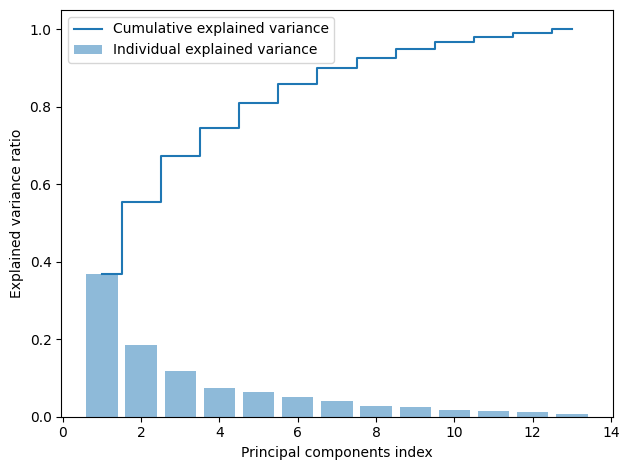

In [5]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse= True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha =0.5, align= 'center', label = 'Individual explained variance')
plt.step(range(1,14), cum_var_exp, where = 'mid', label = 'Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components index')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [6]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vacs[:,i]) for i in range(len(eigen_vals))]

eigen_pairs.sort(key=lambda k : k[0], reverse = True)


In [7]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
w

array([[-0.13724218,  0.50303478],
       [ 0.24724326,  0.16487119],
       [-0.02545159,  0.24456476],
       [ 0.20694508, -0.11352904],
       [-0.15436582,  0.28974518],
       [-0.39376952,  0.05080104],
       [-0.41735106, -0.02287338],
       [ 0.30572896,  0.09048885],
       [-0.30668347,  0.00835233],
       [ 0.07554066,  0.54977581],
       [-0.32613263, -0.20716433],
       [-0.36861022, -0.24902536],
       [-0.29669651,  0.38022942]])

In [8]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [9]:
X_train_pca = X_train_std.dot(w)

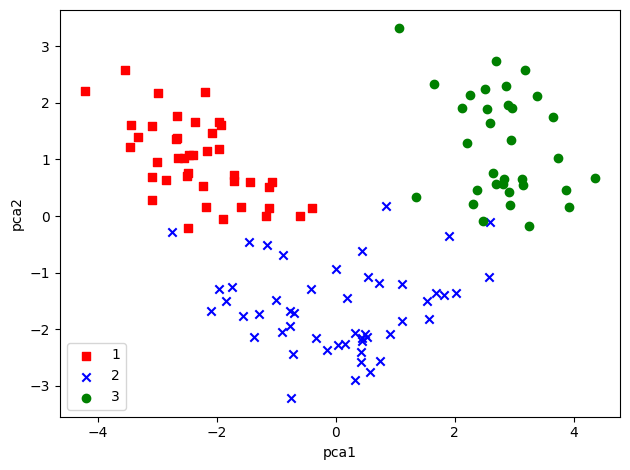

In [11]:
colors = ['r','b','g']
markers = ['s','x','o']

for l, c ,m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train ==l, 0],
                X_train_pca[y_train ==l, 1],
                c = c, label = l, marker = m)
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

In [12]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y, classifier, test_idx = None, resolution = 0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min , x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min , x2_max = X[:,1].min() - 1, X[:,1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha = 0.3, cmap =cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y = X[y == cl, 1],
                    alpha = 0.6, c=colors[idx],
                    marker= markers[idx], label = cl,
                    edgecolor='black')


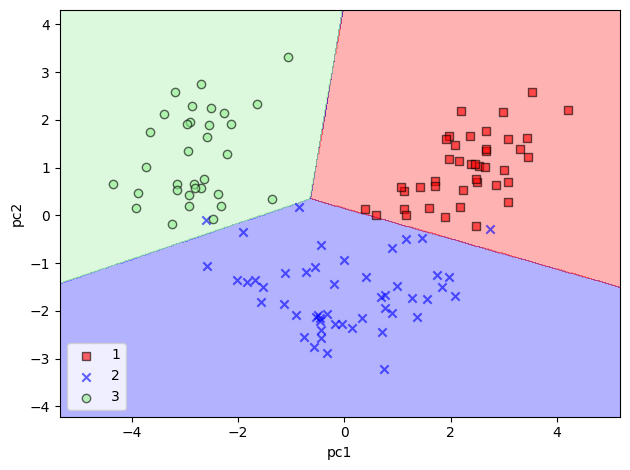

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
lr = LogisticRegression(random_state = 1)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)

plot_decision_regions(X_train_pca, y_train, classifier=lr)

plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

In [14]:
import warnings
warnings.filterwarnings('ignore')

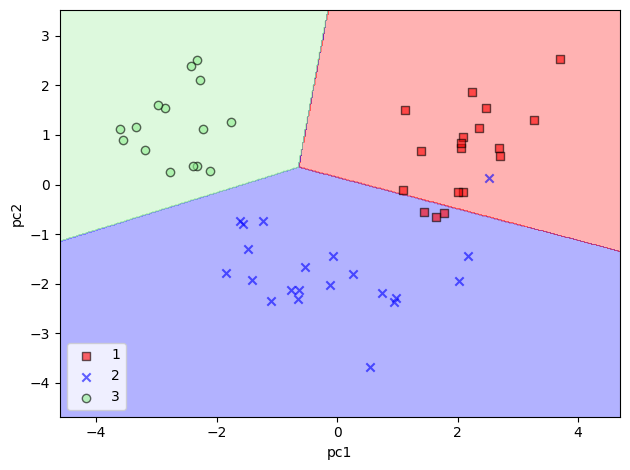

In [17]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)

plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

In [18]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)

pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

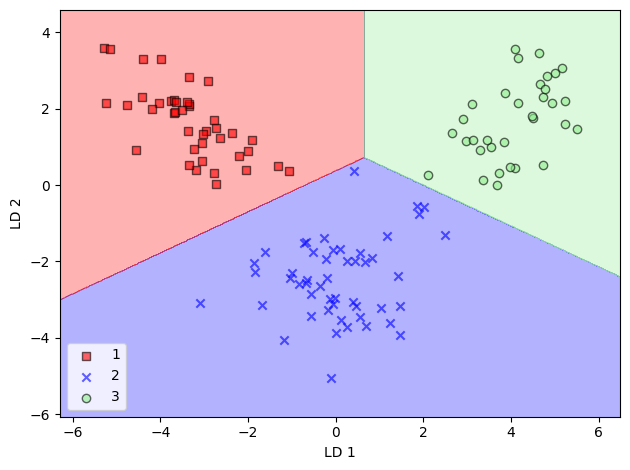

In [35]:
lr = LogisticRegression(random_state = 1)
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel("LD 1")
plt.ylabel("LD 2")
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()


In [39]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from scipy.spatial.distance import pdist, squareform
from numpy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X,gamma,n_components):
    sq_dists = pdist(X, 'sqeuclidean')
    mat_sq_dists = squareform(sq_dists)

    K = exp(-gamma * mat_sq_dists)

    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

    X_pc = np.column_stack([eigvecs[::-1] for i in range(n_components)])
    return X_pc




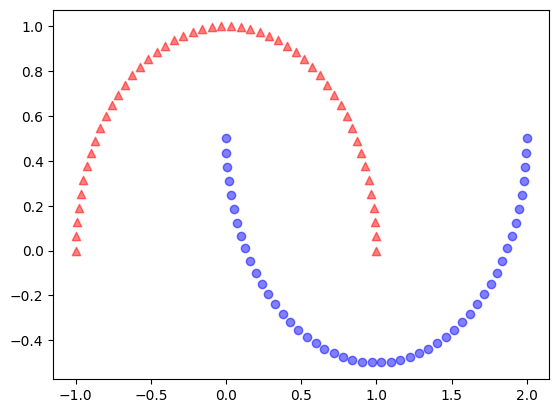

In [5]:
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt

X, y = make_moons(n_samples =100, random_state = 123)
plt.scatter(X[y==0,0], X[y==0,1],color = 'red', marker = '^', alpha = 0.5)
plt.scatter(X[y==1,0], X[y==1,1],color = 'blue', marker = 'o', alpha = 0.5)
plt.show()

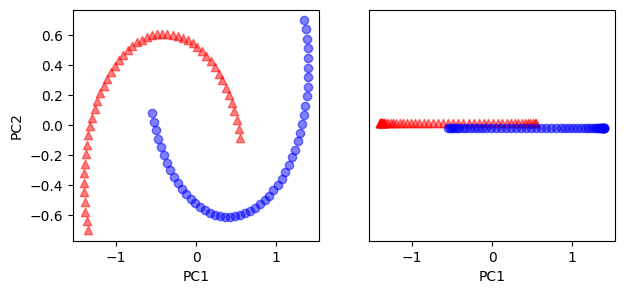

In [6]:
from sklearn.decomposition import PCA, KernelPCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
flg, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0,0], X_spca[y==0,1], color ='red', marker = '^', alpha = 0.5)
ax[0].scatter(X_spca[y==1,0], X_spca[y==1,1], color ='blue', marker = 'o', alpha = 0.5)
ax[1].scatter(X_spca[y==0,0], np.zeros((50,1))+0.02, color ='red', marker = '^', alpha = 0.5)
ax[1].scatter(X_spca[y==1,0], np.zeros((50,1))-0.02, color ='blue', marker = 'o', alpha = 0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

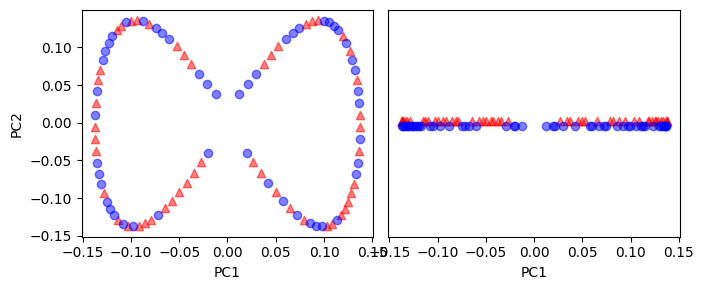

In [9]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
            color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
            color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y==0, 0], np.zeros((50, 1))+0.02,
            color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50, 1))-0.02,
            color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()

plt.show()

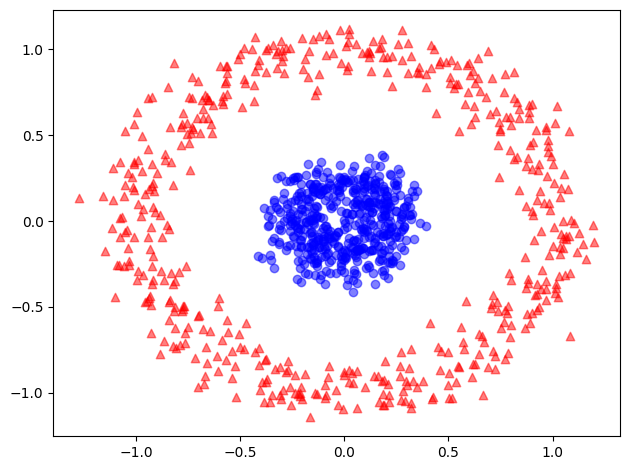

In [10]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples = 1000, random_state = 123, noise =0.1 , factor=0.2)
plt.scatter(X[y==0,0], X[y==0,1],color = 'red', marker = '^', alpha = 0.5)
plt.scatter(X[y==1,0], X[y==1,1],color = 'blue', marker = 'o', alpha = 0.5)
plt.tight_layout()
plt.show()

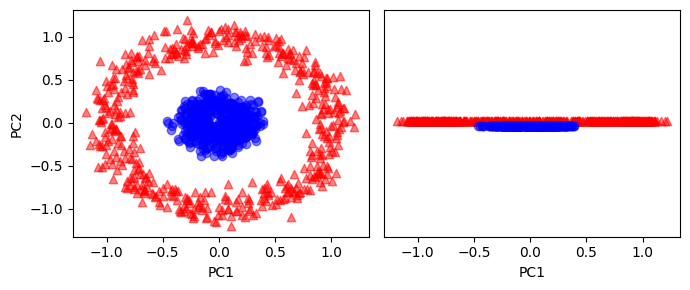

In [14]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0,0], X_spca[y==0,1], color ='red', marker = '^', alpha = 0.5)
ax[0].scatter(X_spca[y==1,0], X_spca[y==1,1], color ='blue', marker = 'o', alpha = 0.5)
ax[1].scatter(X_spca[y==0,0], np.zeros((500,1))+0.02, color ='red', marker = '^', alpha = 0.5)
ax[1].scatter(X_spca[y==1,0], np.zeros((500,1))-0.02, color ='blue', marker = 'o', alpha = 0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

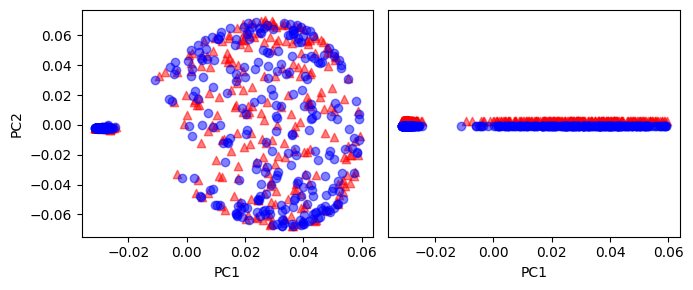

In [15]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
            color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
            color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((500, 1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500, 1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()